In [42]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [43]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

In [44]:
def InfoImage(IM):
    Image = IM
    Width = Image.shape[1]
    Height = Image.shape[0]
    Channel = len(Image.shape)
    print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)
    
    if(Channel == 2):
        print("Min Intensity: ", IM.min(), " Max Intensity: ", IM.max())
    else:
        print("Red - Min Intensity: ", IM[:,:,0].min(), " Max Intensity: ", IM[:,:,0].max())
        print("Green - Min Intensity: ", IM[:,:,1].min(), " Max Intensity: ", IM[:,:,1].max())
        print("Blue - Min Intensity: ", IM[:,:,2].min(), " Max Intensity: ", IM[:,:,2].max())  

In [45]:
def ResizeImage(IM, DesiredWidth, DesiredHeight):
    from skimage.transform import rescale, resize
    
    OrigWidth = float(IM.shape[1])
    OrigHeight = float(IM.shape[0])
    Width = DesiredWidth 
    Height = DesiredHeight

    if((Width == 0) & (Height == 0)):
        return IM
    
    if(Width == 0):
        Width = int((OrigWidth * Height)/OrigHeight)

    if(Height == 0):
        Height = int((OrigHeight * Width)/OrigWidth)

    dim = (Width, Height)
#     print(dim)
    resizedIM = cv2.resize(IM, dim, interpolation = cv2.INTER_NEAREST) 
#     imshows([IM, resizedIM], ["Image", "resizedIM"],1,2)

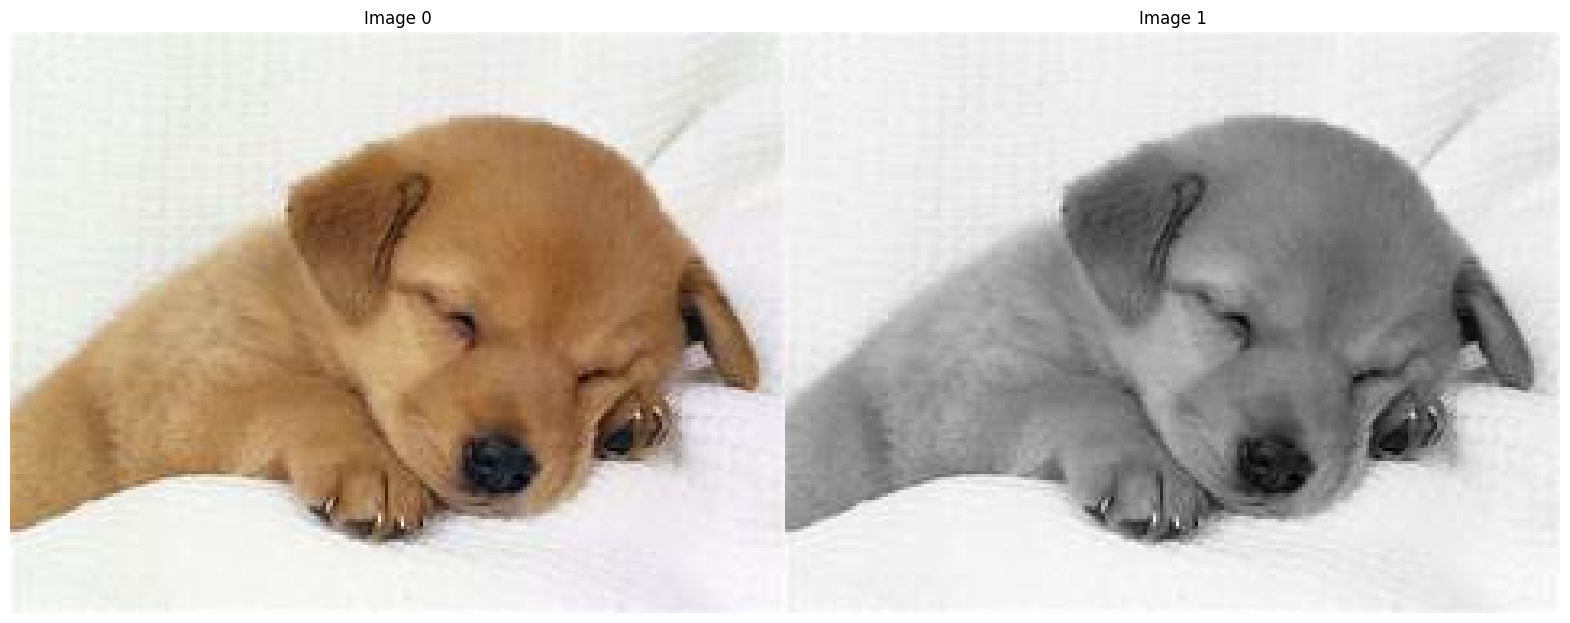

In [70]:
# Read Image 
image_color = imread("th (1).jfif")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowImage([image_color, image_gray], 1, 2)


 image_color :
Width :  240  Height :  180  Channel :  3
Red - Min Intensity:  0  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  255
Blue - Min Intensity:  0  Max Intensity:  255

 image_scale01 :
Width :  120  Height :  180  Channel :  3
Red - Min Intensity:  0  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  255
Blue - Min Intensity:  0  Max Intensity:  255

 image_scale02 :
Width :  120  Height :  90  Channel :  3
Red - Min Intensity:  5  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  253
Blue - Min Intensity:  0  Max Intensity:  255

 image_scale03 :
Width :  240  Height :  90  Channel :  3
Red - Min Intensity:  4  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  255
Blue - Min Intensity:  0  Max Intensity:  255


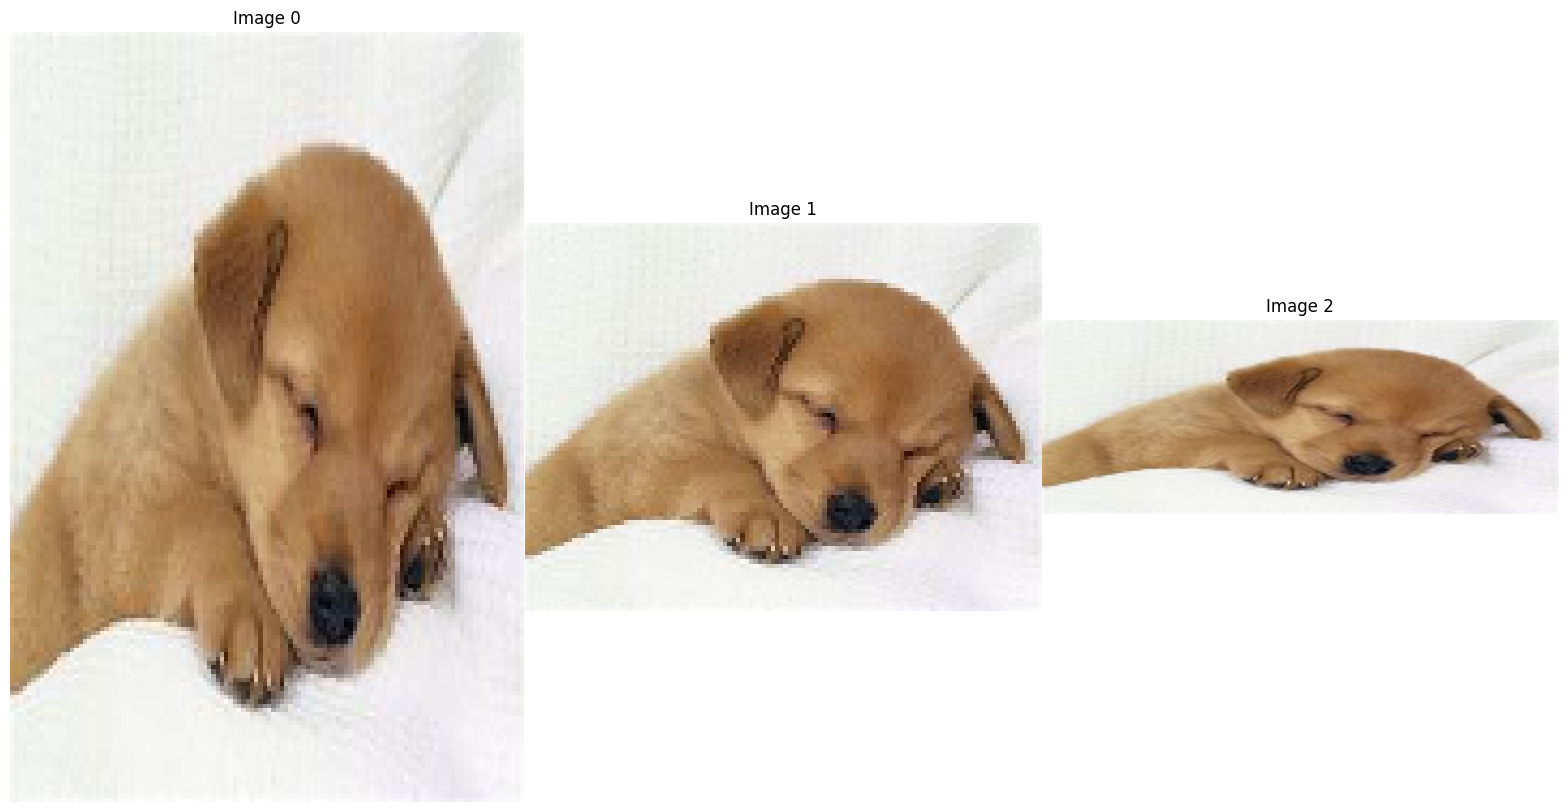

In [71]:
# Scaling
image_scale01 = cv2.resize(image_color,None,fx=0.5, fy=1, interpolation = cv2.INTER_CUBIC)
image_scale02 = cv2.resize(image_color,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
image_scale03 = cv2.resize(image_color,None,fx=1, fy=0.5, interpolation = cv2.INTER_CUBIC)

print("\n image_color :")
InfoImage(image_color)
print("\n image_scale01 :")
InfoImage(image_scale01)
print("\n image_scale02 :")
InfoImage(image_scale02)
print("\n image_scale03 :")
InfoImage(image_scale03)

ShowImage([image_scale01, image_scale02, image_scale03], 1, 3)

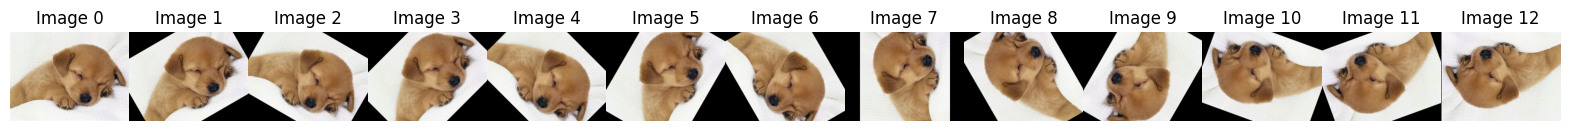

In [11]:
rows,cols  = image_color.shape[:2]
# Góc quay cần thêm
angles = [30, -30, 45, -45, 60, -60, 90, 120, -120, 160, -160, 180]

# Danh sách lưu trữ các hình ảnh đã xoay
rotated_images = []

for angle in angles:
    RotationMatrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image_color, RotationMatrix, (cols, rows))
    rotated_images.append(rotated_image)

# Hiển thị hình ảnh gốc và các hình ảnh đã xoay
images_to_show = [image_color] + rotated_images
ShowImage(images_to_show, 1, len(images_to_show))

In [19]:
# Translation
rows,cols  = image_color.shape[:2]

TranslationMatrix = np.float32([[1,0,200],[0,1,0]])
image_translation01 = cv2.warpAffine(image_color,TranslationMatrix,(cols,rows))

TranslationMatrix = np.float32([[1,0,0],[0,1,200]])
image_translation02 = cv2.warpAffine(image_color,TranslationMatrix,(cols,rows))

TranslationMatrix = np.float32([[1,0,200],[0,1,200]])
image_translation03 = cv2.warpAffine(image_color,TranslationMatrix,(cols,rows))

TranslationMatrix = np.float32([[1,0,-200],[0,1,-200]])
image_translation04 = cv2.warpAffine(image_color,TranslationMatrix,(cols,rows))

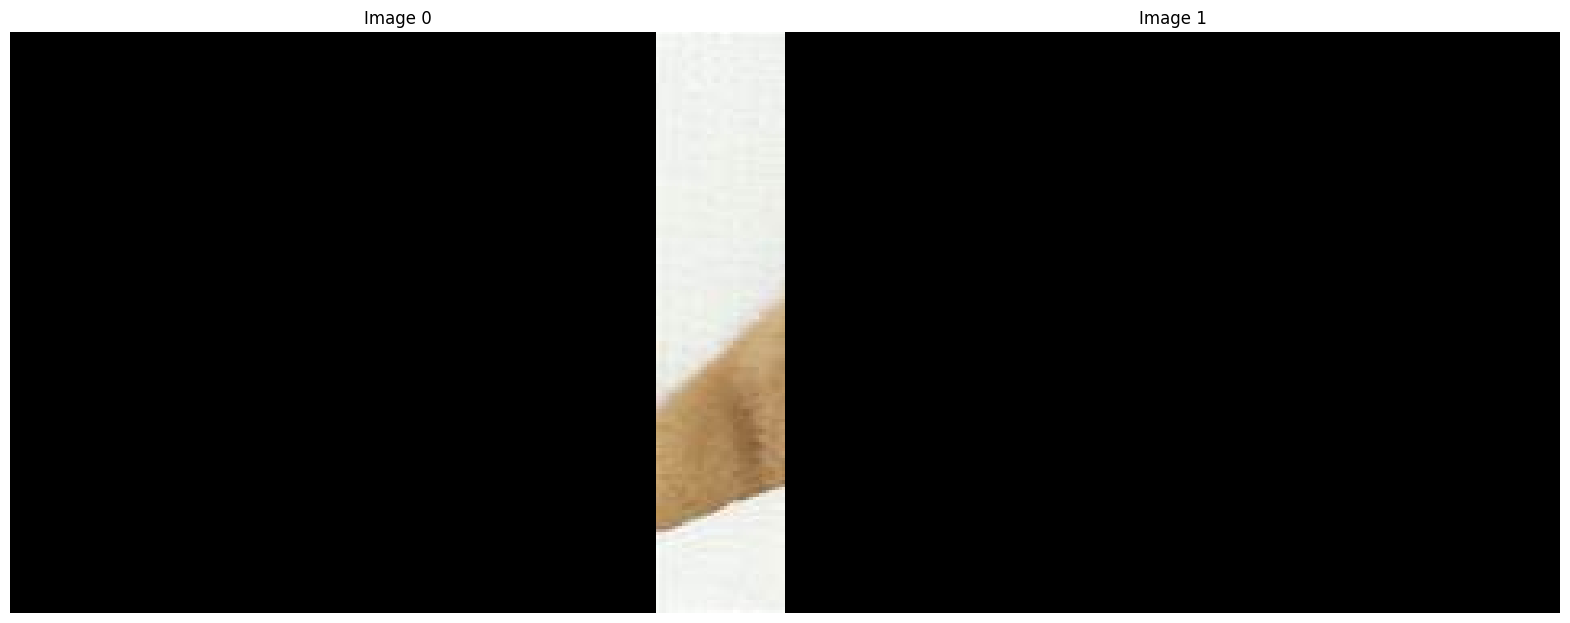

In [20]:
ShowImage([image_translation01, image_translation02], 1, 2)

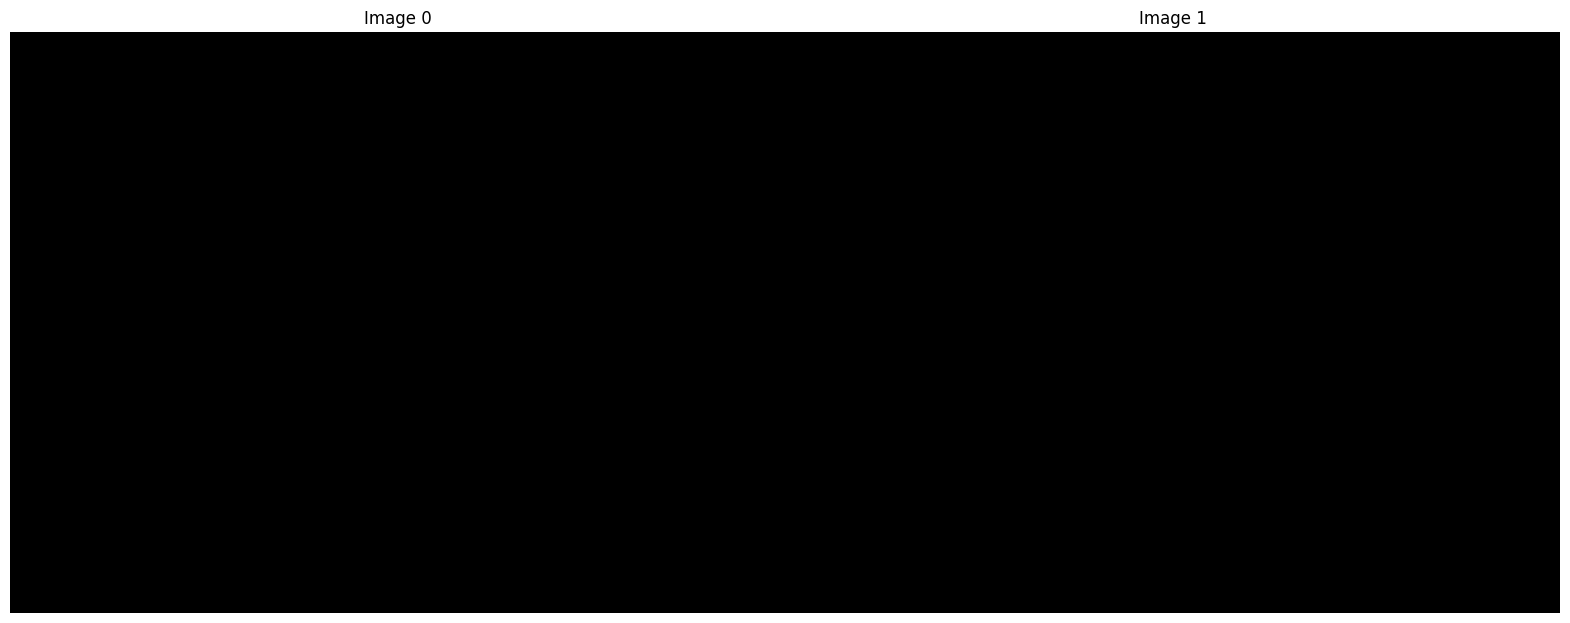

In [21]:
ShowImage([image_translation03, image_translation04], 1, 2)

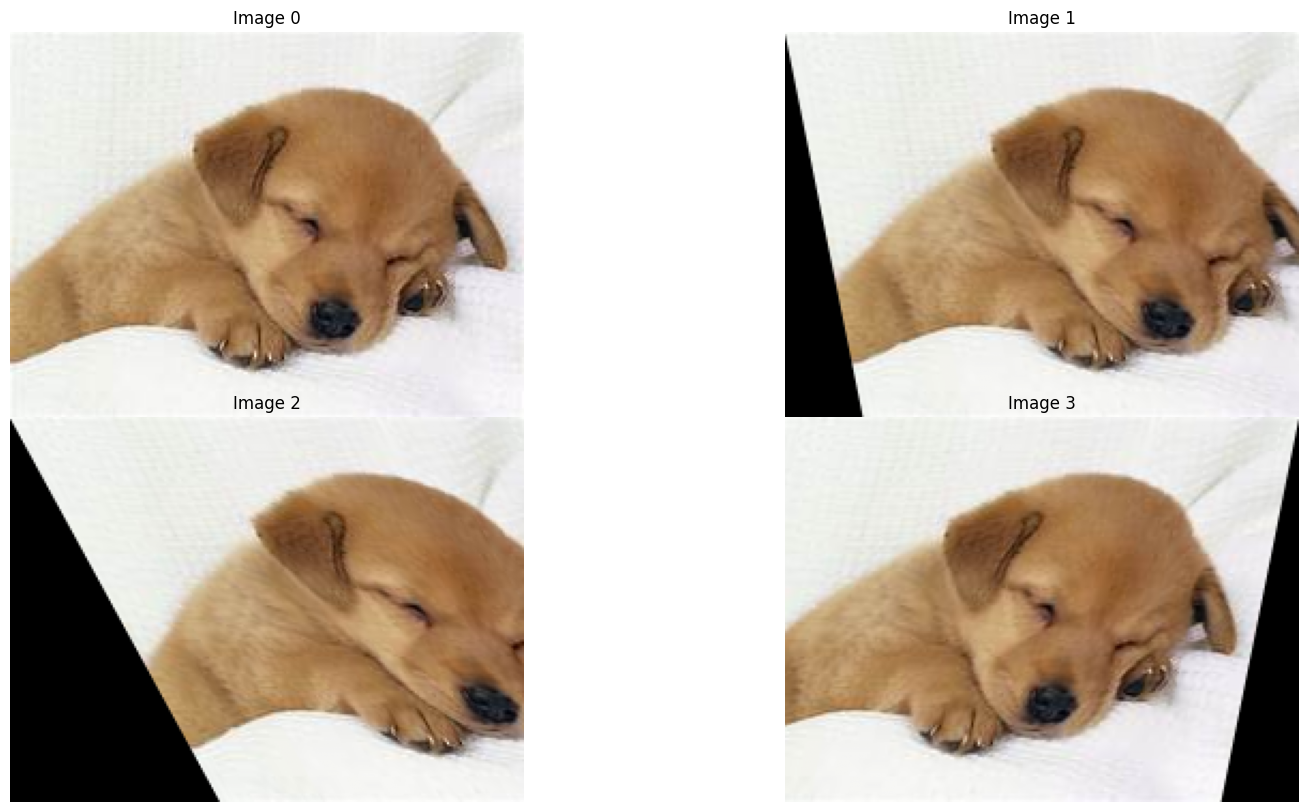

In [23]:
from skimage import transform as tf

# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.2)
image_shear01 = tf.warp(image_color, inverse_map=afine_tf)

afine_tf = tf.AffineTransform(shear=0.5)
image_shear02 = tf.warp(image_color, inverse_map=afine_tf)

afine_tf = tf.AffineTransform(shear=-0.2)
image_shear03 = tf.warp(image_color, inverse_map=afine_tf)

ShowImage([image_color, image_shear01, image_shear02, image_shear03], 2, 2)

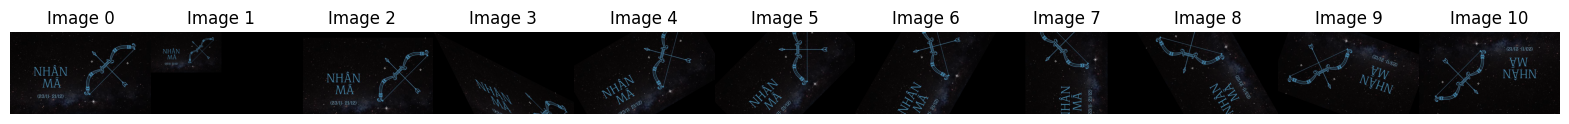

In [33]:
    # Đọc ảnh từ máy tính (thay thế đường dẫn bằng ảnh của bạn)
    image_path = '9-nhan-ma.png'
    image = cv2.imread(image_path)

    # Scaling
    scaling_matrix = np.array([[0.5, 0, 0], [0, 0.5, 0]])
    scaled_image = cv2.warpAffine(image, scaling_matrix, (image.shape[1], image.shape[0]))
    
    # Rotation
    angles = [30, 45, 60, 90, 120, 160, 180]
    rotated_images = []

    for angle in angles:
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        rotated_images.append(rotated_image)

    # Translation
    translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

    # Shearing
    shear_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

    # Hiển thị hình ảnh gốc và các hình ảnh đã biến đổi
    ShowImage([image, scaled_image, translated_image, sheared_image] + rotated_images,2,len([image, scaled_image, translated_image, sheared_image] + rotated_images))

Width :  780  Height :  520  Channel :  3
Red - Min Intensity:  0.0  Max Intensity:  0.99215686
Green - Min Intensity:  0.0  Max Intensity:  0.9647059
Blue - Min Intensity:  0.0  Max Intensity:  0.9490196


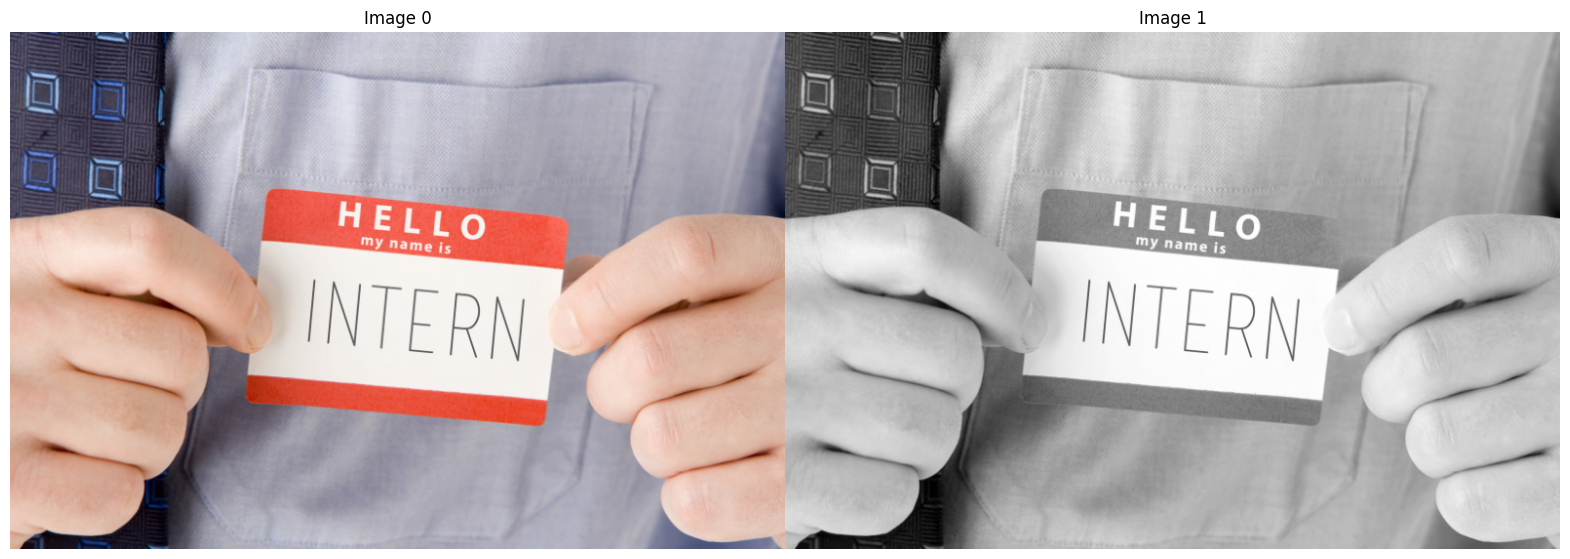

In [62]:
# Read Image 
image_color = imread("intern11.png")
#image_color = ResizeImage(image_color, 700, 400)
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
InfoImage(image_color)
ShowImage([image_color, image_gray], 1, 2)

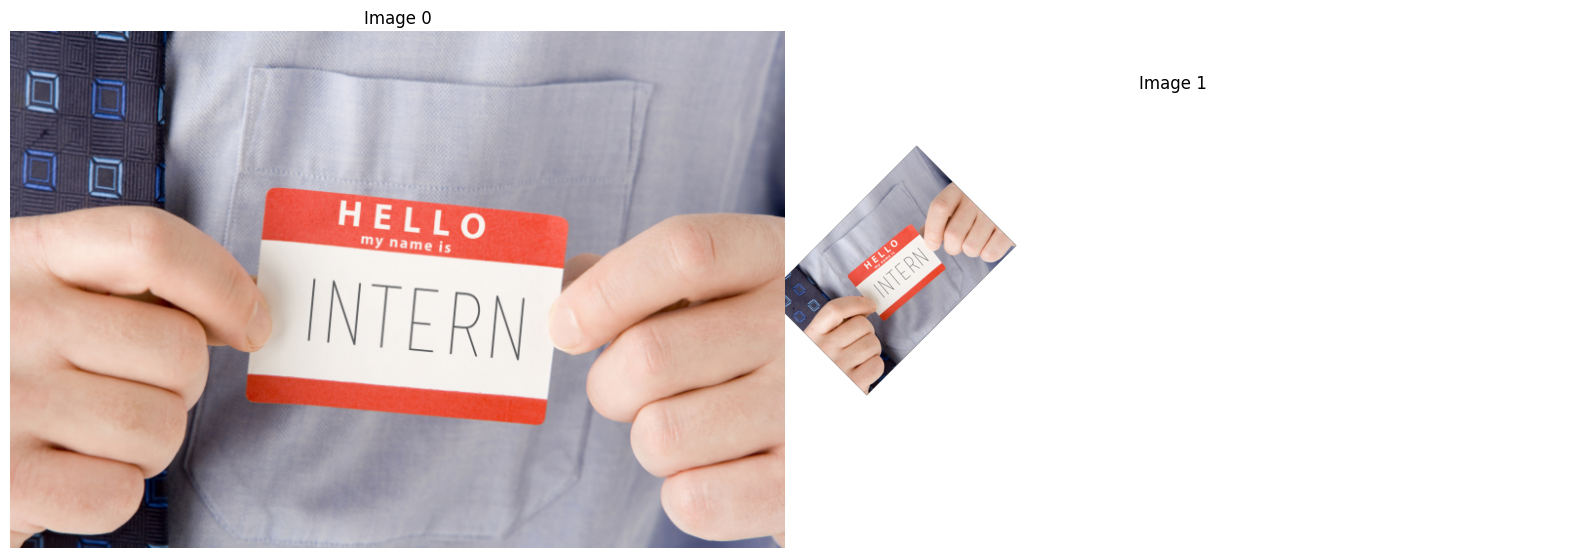

In [64]:
# Scaling -> Rotation
scale_x = 0.7 # Tỷ lệ scaling theo trục x
scale_y = 0.7 # Tỷ lệ scaling theo trục y
angle = 45 # Góc xoay (đơn vị: độ)
scaling_matrix = np.array([[scale_x, 0, 0], [0, scale_y, 0], [0, 0, 1]]) # Ma␣trận scaling
rotation_matrix = cv2.getRotationMatrix2D((600, 314), angle, 1) # Ma trận␣rotation
transformation_matrix = np.dot(rotation_matrix, scaling_matrix) # Nhân ma trận␣ scaling và rotation
transformed_image11 = cv2.warpAffine(image_color, transformation_matrix, (2000,1000))
ShowImage([image_color,transformed_image11],1,2)

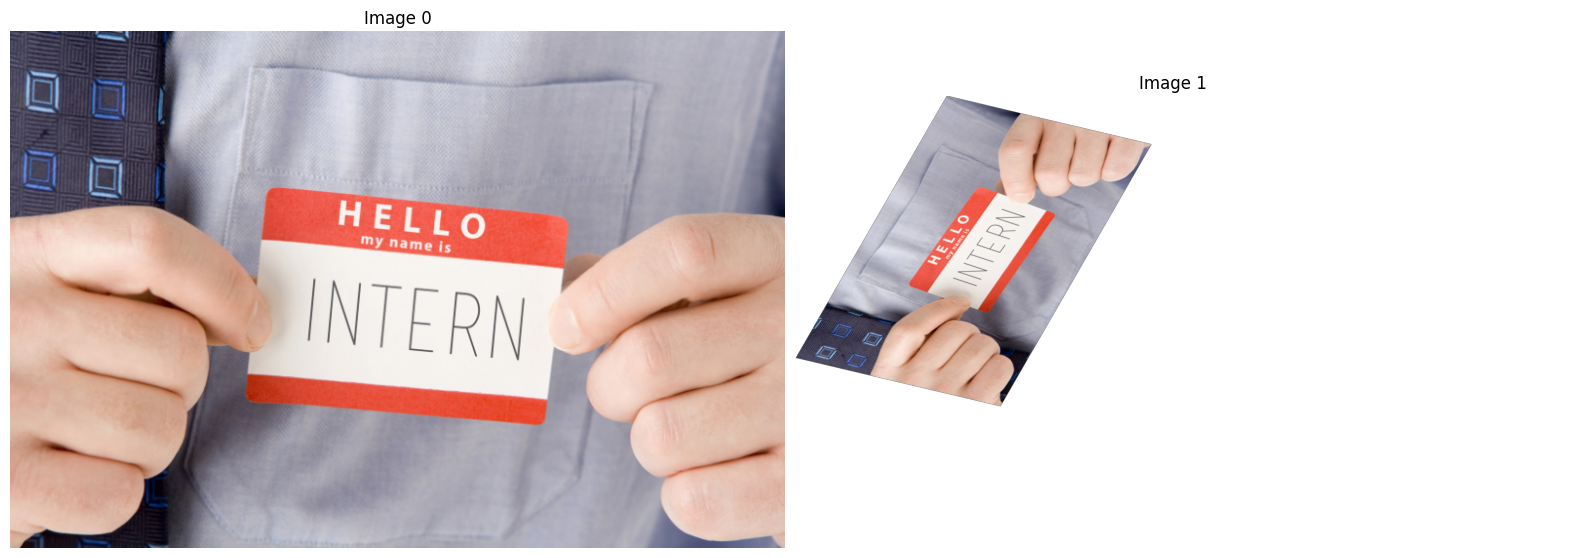

In [66]:
# Rotation -> Shearing
angle = 60 # Góc xoay (đơn vị: độ)
shx = 0.3 # Hệ số nghiêng
rotation_matrix = cv2.getRotationMatrix2D((600, 314), angle, 1) # Ma trận␣ rotation
shearing_matrix = np.array([[1, shx, 0], [0, 1, 0], [0, 0, 1]]) # Ma trận shearing
transformation_matrix = np.dot(rotation_matrix, shearing_matrix) # Nhân ma␣trận shearing và rotation
transformed_image12 = cv2.warpAffine(image_color, transformation_matrix, (2000,1000))
ShowImage([image_color,transformed_image12],1,2)

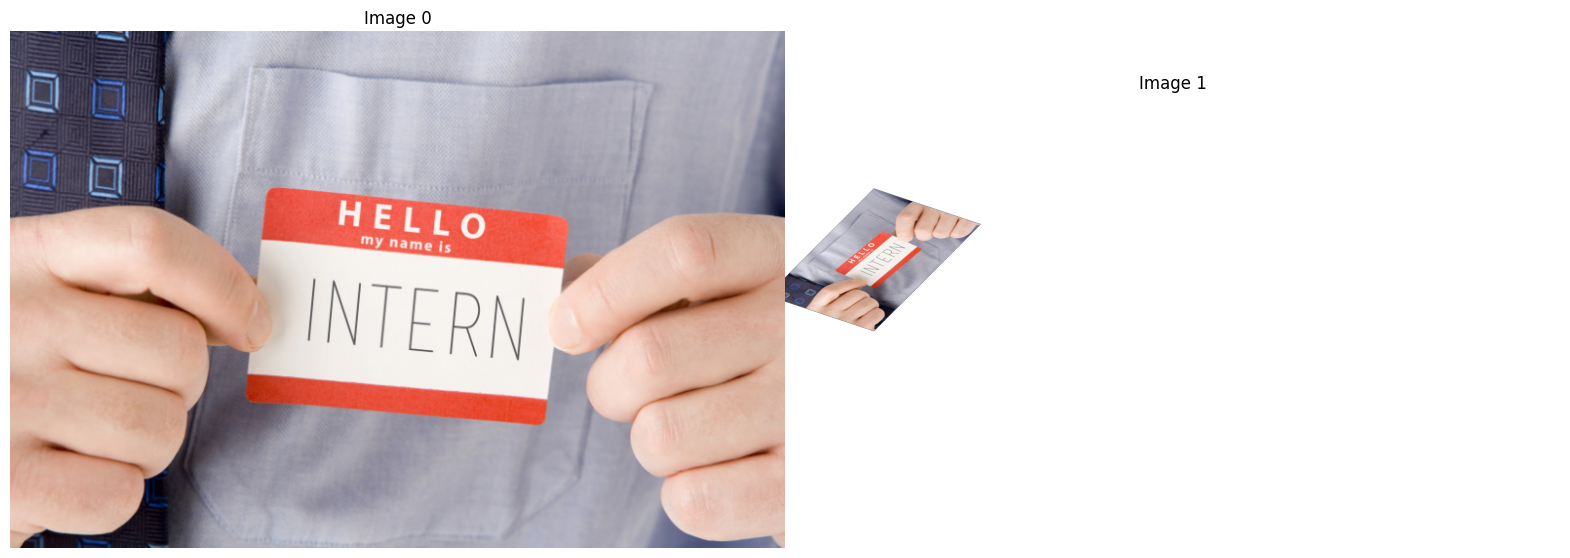

In [68]:
# Scaling -> Rotation -> Shearing
scale_x = 0.5 # Tỷ lệ scaling theo trục x
scale_y = 0.5 # Tỷ lệ scaling theo trục y
angle = 45 # Góc xoay (đơn vị: độ)
10
shx = 0.5 # Hệ số nghiêng
center_x = 600 # Tâm xoay trục x
center_y = 314 # Tâm xoay trục y
scaling_matrix = np.array([[scale_x, 0, 0], [0, scale_y, 0], [0, 0, 1]]) # Ma␣trận scaling
rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1) # Ma␣trận rotation
shearing_matrix = np.array([[1, shx, 0], [0, 1, 0], [0, 0, 1]]) # Ma trận␣shearing
transformation_matrix = np.dot(np.dot(rotation_matrix, shearing_matrix),scaling_matrix) # Nhân ma trận scaling, rotation và shearing
transformed_image13 = cv2.warpAffine(image_color, transformation_matrix, (2000,1000))
ShowImage([image_color,transformed_image13],1,2)

Width :  696  Height :  551  Channel :  3
Red - Min Intensity:  0  Max Intensity:  255
Green - Min Intensity:  0  Max Intensity:  255
Blue - Min Intensity:  0  Max Intensity:  255


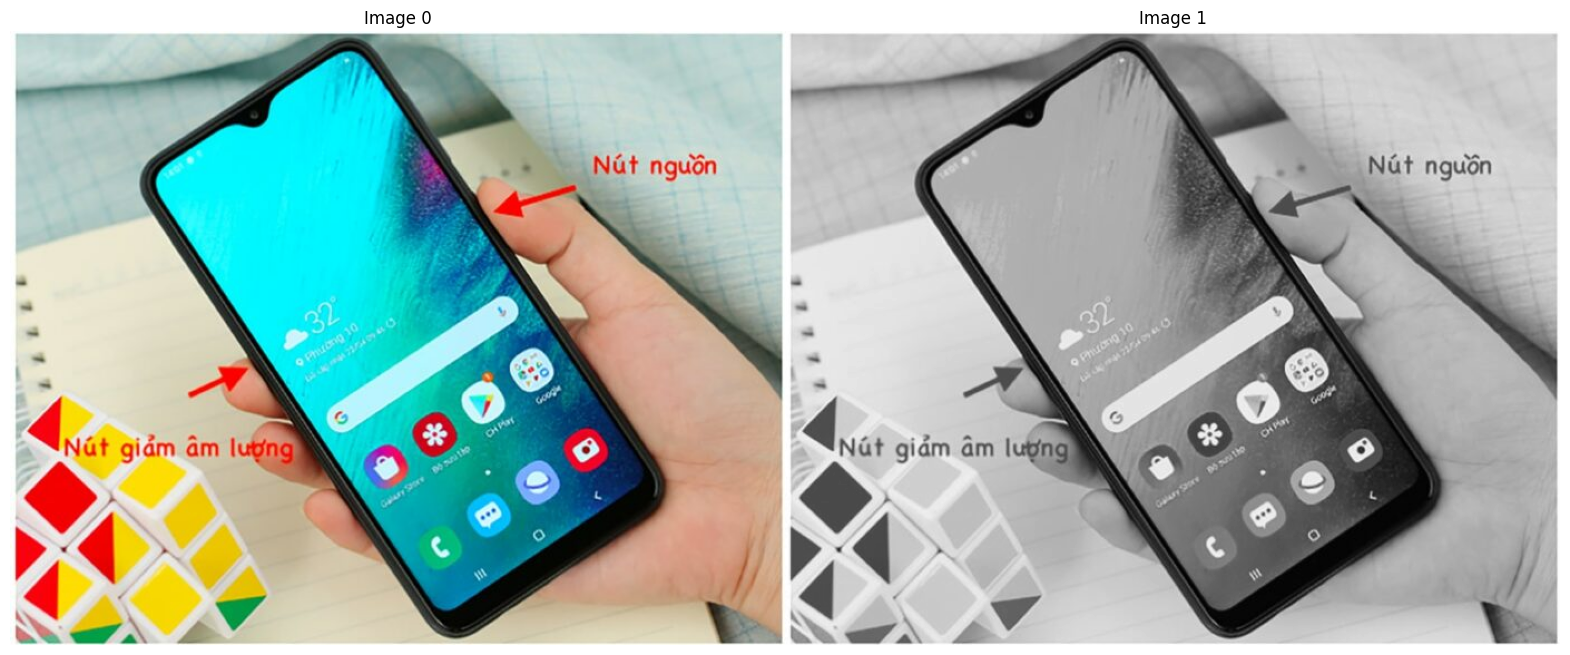

In [53]:
# Read Image 
image_color = imread("cach-chup-man-hinh-dien-thoai-samsung-galaxy-a10-1-min-696x551.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
InfoImage(image_color)
ShowImage([image_color, image_gray], 1, 2)

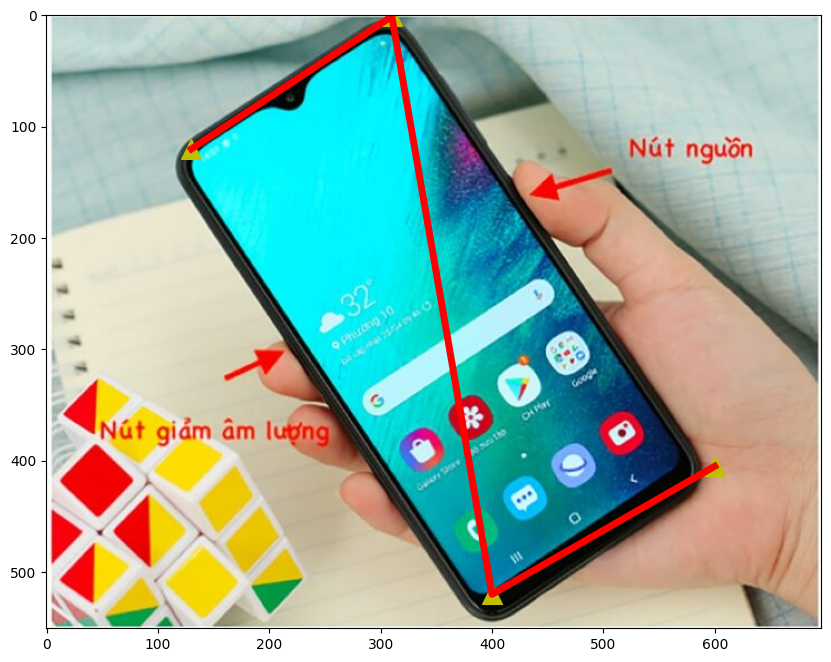

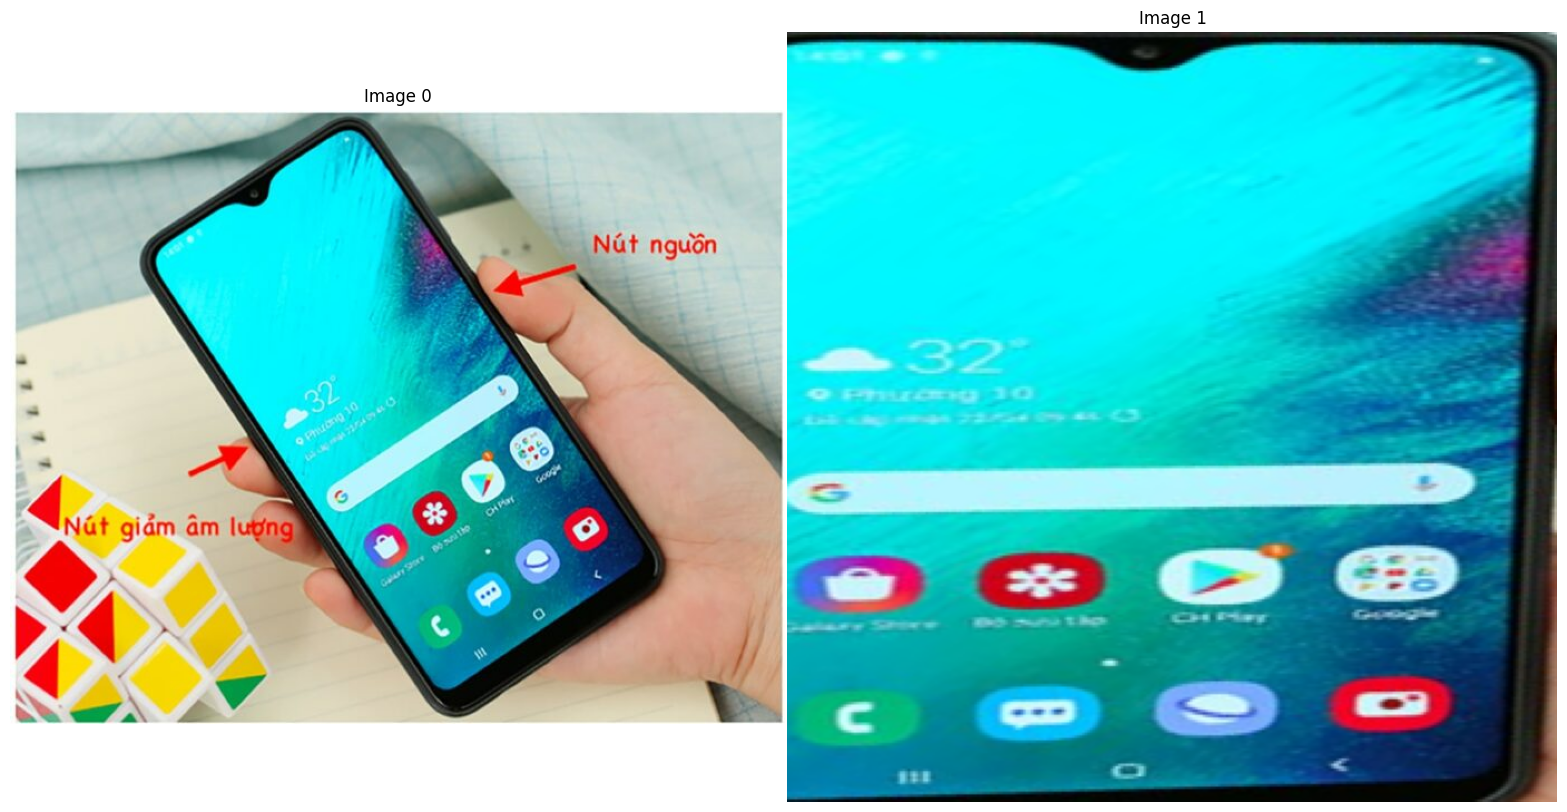

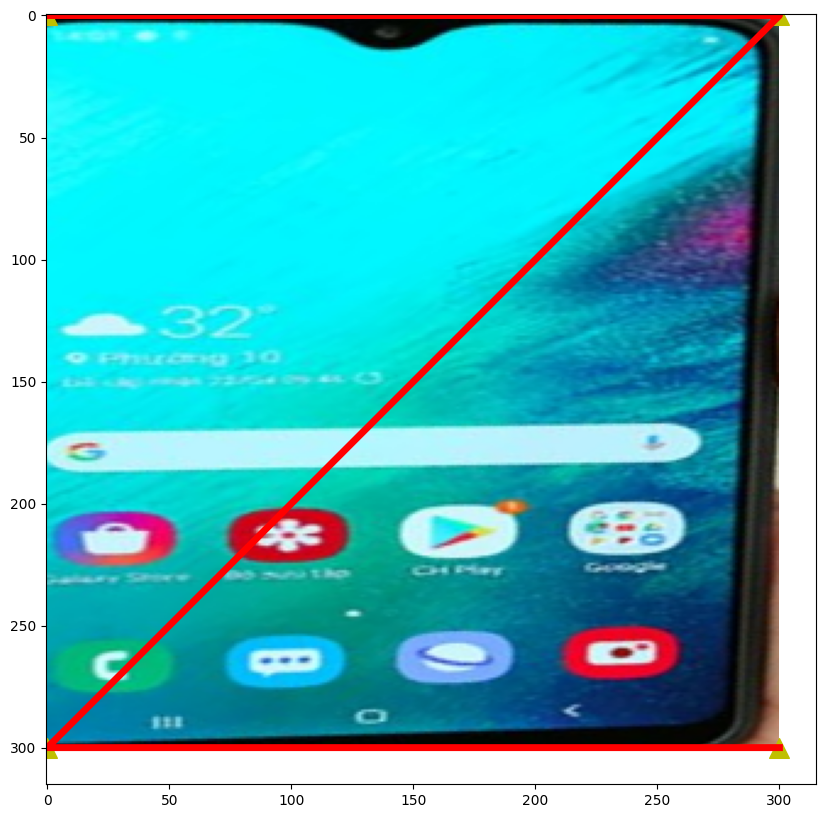

In [61]:
rows,cols,ch = image_color.shape

PointList_From = [[130,120],[310,1],[400,520],[600,405]]
PointList_To = [[0,0],[300,0],[0,300],[300,300]]

XList = []
YList = []

for pt in PointList_From:
    XList.append(pt[0])
    YList.append(pt[1])
    
plt.figure(figsize=(10,10))
plt.imshow(image_color)

plt.scatter(XList, YList, c='y', s=200, marker='^')
plt.plot(XList,YList,'r', linewidth=5, markersize=12)

plt.show()


pts1 = np.float32(PointList_From)
pts2 = np.float32(PointList_To)
MappingMatrix = cv2.getPerspectiveTransform(pts1,pts2)
image_Perspective = cv2.warpPerspective(image_color,MappingMatrix,(300,300))
ShowImage([image_color, image_Perspective], 1, 2)

XList = []
YList = []

for pt in PointList_To:
    XList.append(pt[0])
    YList.append(pt[1])
    
plt.figure(figsize=(10,10))
plt.imshow(image_Perspective)

plt.scatter(XList, YList, c='y', s=200, marker='^')
plt.plot(XList,YList,'r', linewidth=5, markersize=12)

plt.show()